<a href="https://colab.research.google.com/github/gfxluffy/Neural-Style-Transfer-with-PyTorch/blob/main/Neural_Style_Transfer_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [1]:
!pip install torch torchvision

In [2]:
!git clone https://github.com/parth1620/Project-NST.git

fatal: destination path 'Project-NST' already exists and is not an empty directory.


## Task 2 : Loading VGG Pretrained Model

In [3]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained = True) # Load pretrained model
print(vgg)

# In NST, we don't want the classifier part bec we're not gonna extract the content and style features from the classifier,
# we're gonna extract features from the convolution layers

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [4]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [5]:
# Use pretrained weights, no update of weights and biases
# Freeze model so that no gradient computation occurs for model weights in training part

for parameters in vgg.parameters():

  parameters.requires_grad_(False)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Use cuda to move variables and model to GPU
print(device)

cuda


In [7]:
vgg.to(device)  # Move model to GPU

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/vision/stable/models.html

In [8]:
from PIL import Image   # Python Image Library
from torchvision import transforms as T

# Resize image if it exceeds the max_size
def preprocess(img_path, max_size=500):

  image = Image.open(img_path).convert('RGB')
  # print(image.size, max(image.size))
  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  img_transforms = T.Compose([
                              T.Resize(size),
                              T.ToTensor(), # (224, 224, 3) -> (3, 224, 224)
                              T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
  ])
  image = img_transforms(image)
  # Unsqueeze the dimension at axis=0 since we're adding batch size
  # In order to pass image to extract content & style features, need to add batch size
  image = image.unsqueeze(0)  # (3,224,224) -> (1,3,224,224)
  
  return image

In [9]:
content_p = preprocess('/content/Project-NST/content11.jpg')
style_p = preprocess('/content/Project-NST/style12.jpg')

content_p = content_p.to(device) # Move tensor to GPU
style_p = style_p.to(device)

print("Content Shape:", content_p.shape)
print("Style Shape:", style_p.shape)

Content Shape: torch.Size([1, 3, 259, 345])
Style Shape: torch.Size([1, 3, 625, 500])


## Task 4 : Deprocess image

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy() # Bec we converted to ToTensor() format
  image = image.squeeze(0) # (1,3,224,224) -> (3,224,224)
  image = image.transpose(1,2,0) # (3,224,224) -> (224,224,3)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]) # De-normalize
  image = image.clip(0, 1)

  return image


In [11]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print("Deprocess Content Shape:", content_d.shape)
print("Deprocess Style Shape:", style_d.shape)

Deprocess Content Shape: (259, 345, 3)
Deprocess Style Shape: (625, 500, 3)


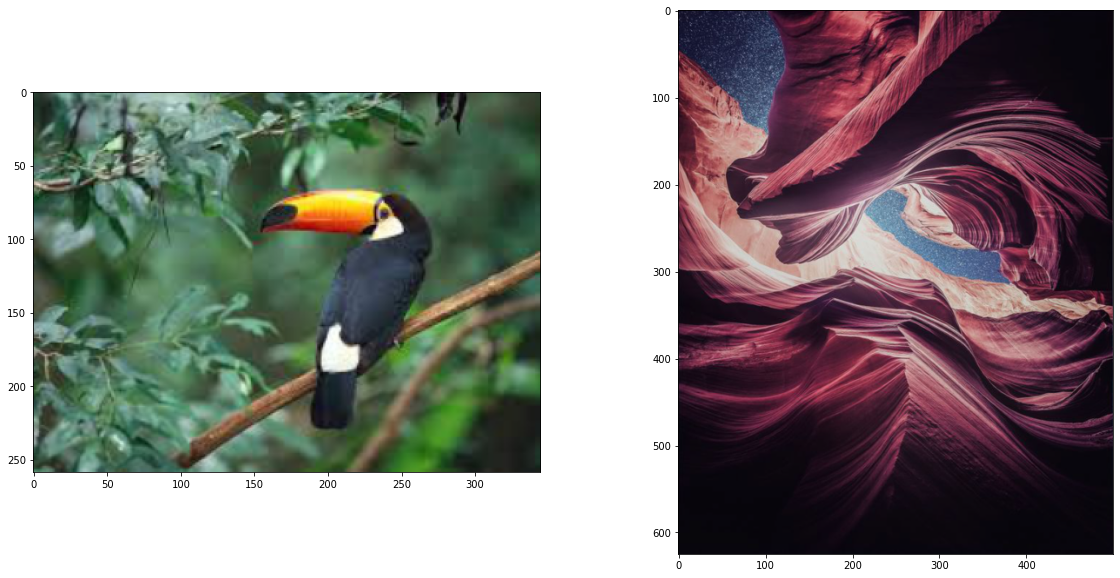

In [12]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [13]:
# Extract content (green) & style (red) features from VGG model conv layers
def get_features(image, model):
  layers = {
      '0': 'conv1_1',
      '5': 'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2',  # content feature
      '28': 'conv5_1'
  }
  x = image
  Features = {}

  for name, layer in model._modules.items():  # _modules.items() - Load layers from vgg19 one by one
    x = layer(x)  # Load image in layer 0, the output will be the input for the next layer
    
    if name in layers:
      Features[layers[name]] = x
  
  return Features

In [14]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

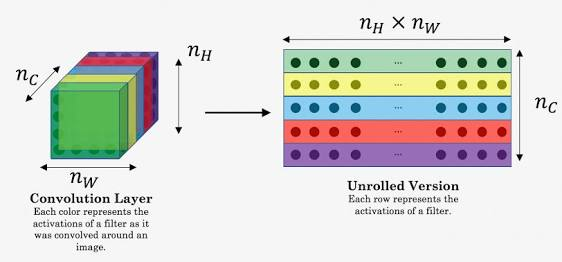

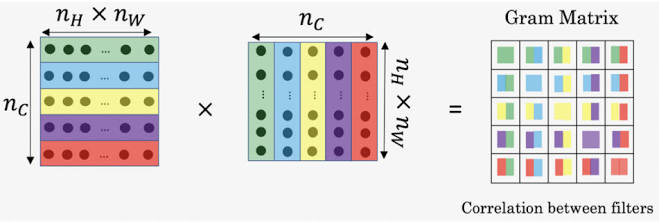

In [15]:
def gram_matrix(tensor):
  b, c, h, w = tensor.size() # Before unrolling, need shape of the tensor
  tensor = tensor.view(c, h*w)  # Unroll
  gram = torch.mm(tensor, tensor.t()) # Matrix multiplication
  return gram

In [16]:
style_grams = {layer: gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [17]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2) ** 2)
  return loss

In [18]:
# Multiply weights when finding style loss
style_weights = {
    'conv1_1': 1.0,
    'conv2_1': 0.75,
    'conv3_1': 0.2,
    'conv4_1': 0.2,
    'conv5_1': 0.2
}

In [19]:
def style_loss(style_weights, target_features, style_grams):
  loss = 0
  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b, c, h, w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram) ** 2)
    loss += layer_loss/(c*h*w)

  return loss

In [20]:
# Initialize target image with either random noise or with content image
target = content_p.clone().requires_grad_(True).to(device) # Find the gradients of the target to update its pixel values
target_f = get_features(target, vgg)
print("Content Loss:", content_loss(target_f['conv4_2'], content_f['conv4_2']))
print("Style Loss:", style_loss(style_weights, target_f, style_grams))

Content Loss: tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss: tensor(1790.8409, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

Generate artistic style image by minimizing content and style loss function

In [21]:
from torch import optim

optimizer = optim.Adam([target], lr=0.003) # Update the pixel values of target
# Generally, we pass w & b for update but here we pass target bec we want to update pixel values when the loss gets minimized

alpha = 1 # Content reconstruction weight
beta = 1e5 # Style reconstruction weight

epochs = 5000
show_every = 500

In [22]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [23]:
# Create training loop
results = []

for i in range(epochs):
  target_f = get_features(target, vgg)

  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad() # Initialize grads to zero
  t_loss.backward() # Find the gradients
  optimizer.step() # Update pixel values

  # Show results every 500 step, store target image in results list
  if i % show_every == 0:
    print(f"Total loss at Epoch {i} : {t_loss}")
    results.append(deprocess(target.detach()))   # Detach the grads

Total loss at Epoch 0 : 179084096.0
Total loss at Epoch 500 : 27111904.0
Total loss at Epoch 1000 : 15141033.0
Total loss at Epoch 1500 : 11684485.0
Total loss at Epoch 2000 : 9626014.0
Total loss at Epoch 2500 : 8214138.5
Total loss at Epoch 3000 : 7194454.5
Total loss at Epoch 3500 : 6446575.5
Total loss at Epoch 4000 : 5875714.0
Total loss at Epoch 4500 : 5446436.0


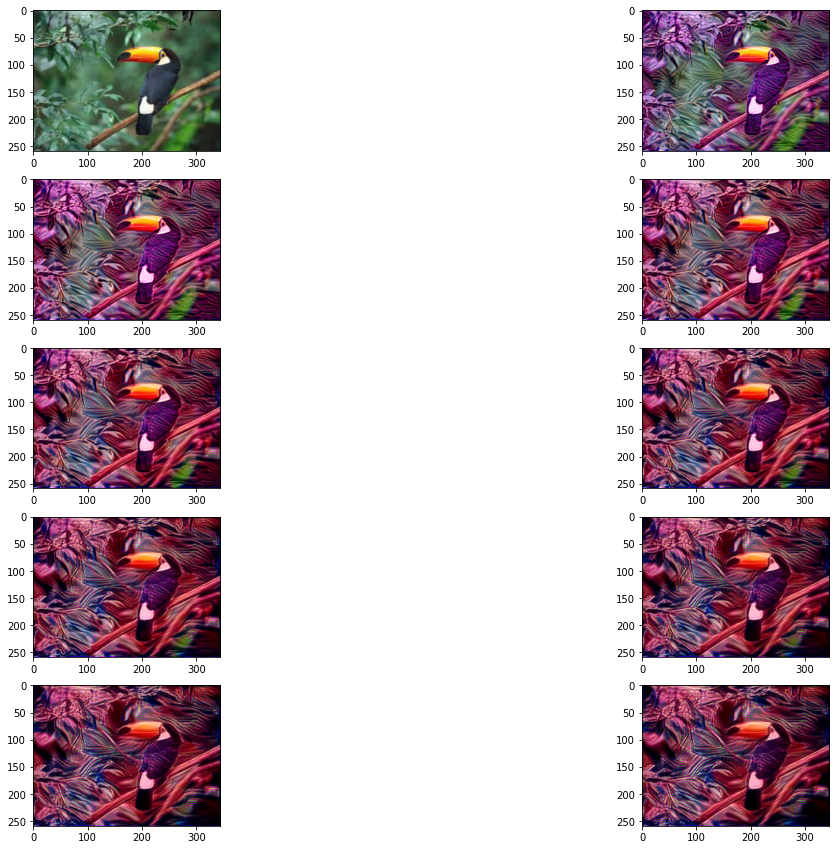

In [26]:
plt.figure(figsize = (20, 15))

for i in range(len(results)):
  plt.subplot(5,2, i+1)
  plt.imshow(results[i])
plt.show()

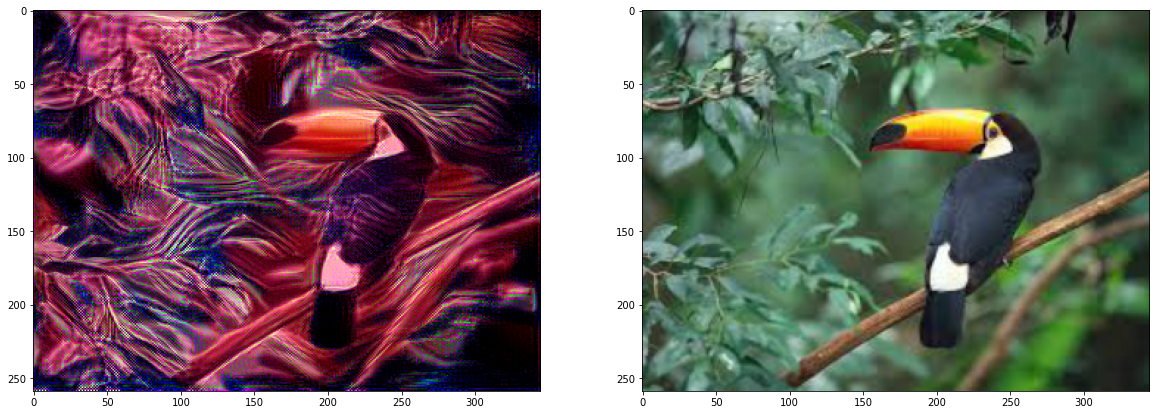

In [28]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p) # content_p has no gradients so no need to detach

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.imshow(target_copy)
ax2.imshow(content_copy)